In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math
import statistics as st




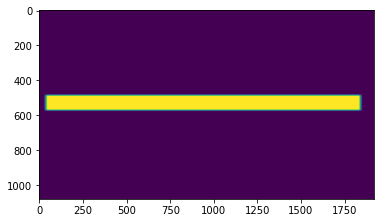

In [117]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)



# マスク範囲を四角形で描画
boxFromX = 2 #マスク範囲開始位置 X座標
boxFromY = 45 #マスク範囲開始位置 Y座標
boxToX = 95 #マスク範囲終了位置 X座標
boxToY = 52 #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

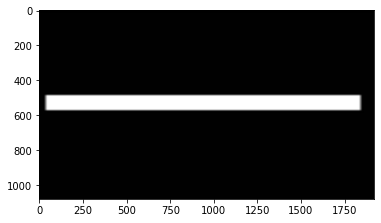

In [118]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

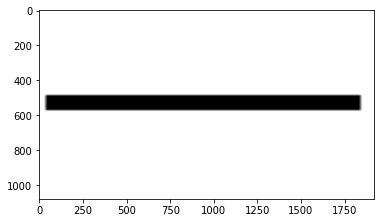

In [119]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

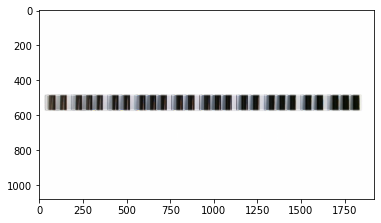

In [120]:
im_1 = cv2.imread('./imagefile/tryout/img_000.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')

im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

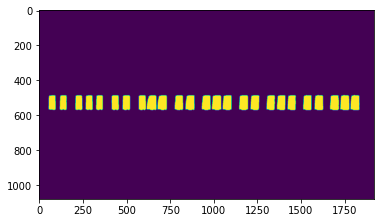

In [121]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
plt.imshow(img_binary)

0 外接矩形の座標
[[1668  487]
 [1718  487]
 [1718  571]
 [1668  571]] 

1 外接矩形の座標
[[1423  570]
 [1426  485]
 [1472  487]
 [1469  571]] 

2 外接矩形の座標
[[1364  487]
 [1411  487]
 [1411  571]
 [1364  571]] 

3 外接矩形の座標
[[1303  570]
 [1306  485]
 [1352  487]
 [1349  571]] 

4 外接矩形の座標
[[1211  570]
 [1214  485]
 [1262  487]
 [1259  571]] 

5 外接矩形の座標
[[1147  487]
 [1197  487]
 [1197  571]
 [1147  571]] 

6 外接矩形の座標
[[1053  487]
 [1103  487]
 [1103  571]
 [1053  571]] 

7 外接矩形の座標
[[ 991  487]
 [1044  487]
 [1044  571]
 [ 991  571]] 

8 外接矩形の座標
[[933 487]
 [983 487]
 [983 571]
 [933 571]] 

9 外接矩形の座標
[[839 487]
 [891 487]
 [891 571]
 [839 571]] 

10 外接矩形の座標
[[777 487]
 [825 487]
 [825 571]
 [777 571]] 

11 外接矩形の座標
[[679 487]
 [732 487]
 [732 571]
 [679 571]] 

12 外接矩形の座標
[[617 487]
 [673 487]
 [673 571]
 [617 571]] 

13 外接矩形の座標
[[572 487]
 [612 487]
 [612 571]
 [572 571]] 

14 外接矩形の座標
[[479 487]
 [521 487]
 [521 571]
 [479 571]] 

15 外接矩形の座標
[[416 487]
 [457 487]
 [457 571]
 [416 571]] 

16 外接矩形の座標
[[327 4

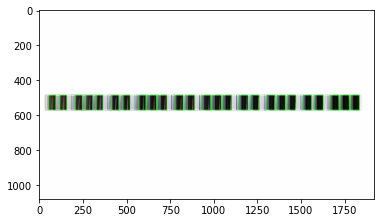

In [122]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [123]:
print(xleft)

[1668, 1423, 1364, 1303, 1211, 1147, 1053, 991, 933, 839, 777, 679, 617, 572, 479, 416, 327, 267, 208, 119, 55, 1785, 1726, 1579, 1514]


In [124]:
print(xright)

[1718, 1472, 1411, 1352, 1262, 1197, 1103, 1044, 983, 891, 825, 732, 673, 612, 521, 457, 365, 308, 248, 158, 95, 1836, 1778, 1628, 1561]


In [125]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [126]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[55, 119, 208, 267, 327, 416, 479, 572, 617, 679, 777, 839, 933, 991, 1053, 1147, 1211, 1303, 1364, 1423, 1514, 1579, 1668, 1726, 1785]
[95, 158, 248, 308, 365, 457, 521, 612, 673, 732, 825, 891, 983, 1044, 1103, 1197, 1262, 1352, 1411, 1472, 1561, 1628, 1718, 1778, 1836]


In [127]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 675),
              (xright[i], 490),
              (0, 0, 0),
              thickness=1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1


In [128]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [129]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

[[0, 55], [95, 119], [158, 208], [248, 267], [308, 327], [365, 416], [457, 479], [521, 572], [612, 617], [673, 679], [732, 777], [825, 839], [891, 933], [983, 991], [1044, 1053], [1103, 1147], [1197, 1211], [1262, 1303], [1352, 1364], [1411, 1423], [1472, 1514], [1561, 1579], [1628, 1668], [1718, 1726], [1778, 1785], [1836, 1920]]


In [130]:
mean=st.mean(xleft)-st.mean(xright)


In [131]:



#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>mean:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 27], [28, 55], [95, 119], [158, 183], [183, 208], [248, 267], [308, 327], [365, 390], [391, 416], [457, 479], [521, 546], [547, 572], [612, 617], [673, 679], [732, 754], [755, 777], [825, 839], [891, 912], [912, 933], [983, 991], [1044, 1053], [1103, 1125], [1125, 1147], [1197, 1211], [1262, 1282], [1283, 1303], [1352, 1364], [1411, 1423], [1472, 1493], [1493, 1514], [1561, 1579], [1628, 1648], [1648, 1668], [1718, 1726], [1778, 1785], [1836, 1878], [1878, 1920]]


In [132]:
print(hakken)

[[0, 27], [28, 55], [95, 119], [158, 183], [183, 208], [248, 267], [308, 327], [365, 390], [391, 416], [457, 479], [521, 546], [547, 572], [612, 617], [673, 679], [732, 754], [755, 777], [825, 839], [891, 912], [912, 933], [983, 991], [1044, 1053], [1103, 1125], [1125, 1147], [1197, 1211], [1262, 1282], [1283, 1303], [1352, 1364], [1411, 1423], [1472, 1493], [1493, 1514], [1561, 1579], [1628, 1648], [1648, 1668], [1718, 1726], [1778, 1785], [1836, 1878], [1878, 1920]]


In [133]:
print(kokken)

[[55, 95], [119, 158], [208, 248], [267, 308], [327, 365], [416, 457], [479, 521], [572, 612], [617, 673], [679, 732], [777, 825], [839, 891], [933, 983], [991, 1044], [1053, 1103], [1147, 1197], [1211, 1262], [1303, 1352], [1364, 1411], [1423, 1472], [1514, 1561], [1579, 1628], [1668, 1718], [1726, 1778], [1785, 1836]]


[[0, 27], [28, 55], [95, 119], [158, 183], [183, 208], [248, 267], [308, 327], [365, 390], [391, 416], [457, 479], [521, 546], [547, 572], [612, 617], [673, 679], [732, 754], [755, 777], [825, 839], [891, 912], [912, 933], [983, 991], [1044, 1053], [1103, 1125], [1125, 1147], [1197, 1211], [1262, 1282], [1283, 1303], [1352, 1364], [1411, 1423], [1472, 1493], [1493, 1514], [1561, 1579], [1628, 1648], [1648, 1668], [1718, 1726], [1778, 1785], [1836, 1878], [1878, 1920]]


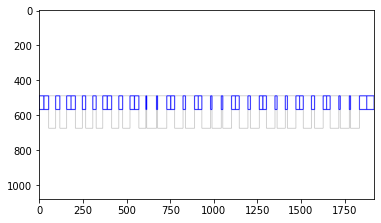

In [134]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,0,255),
              thickness=3,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [135]:
#音の高さを検出
n=0 #右から何番目かを入力　左端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
tensin=0
k=1
while i>=0:
    tensin+=nanabit[i]*k
    k*=2
    i-=1

print(tensin)

28 27
158 119
183 183
308 267
365 327
[1, 1, 0, 1, 1, 0, 0]
108


In [136]:
if tensin==24:hstart=0
if tensin==51:hstart=1
if tensin==102:hstart=2
if tensin==12:hstart=3
if tensin==27:hstart=4
if tensin==54:hstart=5
if tensin==108:hstart=6
print(hstart)


6


In [137]:
#オクターブ
n=2

In [138]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)]
    i+=1
print(hakkendoremi)

['B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F6', 'G6', 'A6', 'B6', 'C7', 'D7', 'E7', 'F7', 'G7', 'A7', 'B7', 'C8']


True

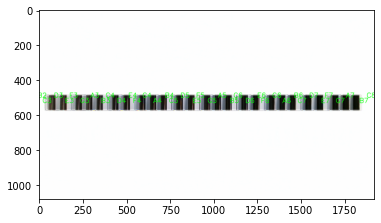

In [139]:
#base2 = cv2.imread("./after/white_resize.jpg")
#base2=im_out
base3=cv2.imread("./after/out.jpg")
plt.imshow(base3)
i=0
while i<len(hakken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-22,500+t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [140]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4
print(hstart,bstart)

6 0


In [141]:
sharp=["C#","D#","F#","G#","A#"]
if hstart==6:
    n+=1
i=0
kokkendoremi=[]
while i<len(kokken):
    kokkendoremi+=[str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)]
    i+=1
print(kokkendoremi)

['C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6', 'F#6', 'G#6', 'A#6', 'C#7', 'D#7', 'F#7', 'G#7', 'A#7']


True

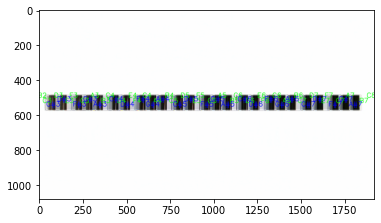

In [142]:
i=0
while i<len(kokken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-35,550-t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

0 外接矩形の座標
[[1783  486]
 [1837  486]
 [1837  571]
 [1783  571]] 

1 外接矩形の座標
[[1723  570]
 [1725  485]
 [1777  486]
 [1775  571]] 

2 外接矩形の座標
[[1666  486]
 [1716  486]
 [1716  572]
 [1666  572]] 

3 外接矩形の座標
[[1576  570]
 [1578  485]
 [1628  486]
 [1626  571]] 

4 外接矩形の座標
[[1511  572]
 [1513  484]
 [1562  486]
 [1559  573]] 

5 外接矩形の座標
[[1421  570]
 [1424  484]
 [1472  486]
 [1469  572]] 

6 外接矩形の座標
[[1360  570]
 [1364  484]
 [1413  486]
 [1410  573]] 

7 外接矩形の座標
[[1302  486]
 [1352  486]
 [1352  571]
 [1302  571]] 

8 外接矩形の座標
[[1210  486]
 [1262  486]
 [1262  572]
 [1210  572]] 

9 外接矩形の座標
[[1144  486]
 [1196  486]
 [1196  572]
 [1144  572]] 

10 外接矩形の座標
[[1050  486]
 [1103  486]
 [1103  572]
 [1050  572]] 

11 外接矩形の座標
[[ 989  486]
 [1042  486]
 [1042  572]
 [ 989  572]] 

12 外接矩形の座標
[[929 486]
 [981 486]
 [981 572]
 [929 572]] 

13 外接矩形の座標
[[837 486]
 [890 486]
 [890 572]
 [837 572]] 

14 外接矩形の座標
[[772 486]
 [824 486]
 [824 572]
 [772 572]] 

15 外接矩形の座標
[[676 486]
 [731 486]
 [731 572]


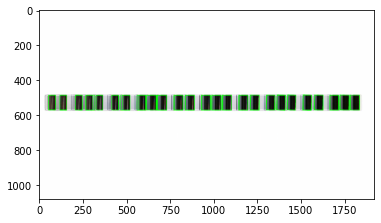

In [143]:
im_mask = cv2.cvtColor(im_mask, cv2.COLOR_BGR2GRAY)
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_1_gray = cv2.bitwise_or(img_1_gray, im_mask)


# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_1_gray,(9,9)) 
threshold=130

img_blur = img_1_gray
cv2.imwrite("./after/image1.jpg",img_blur)



# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 

# img_grayを平均化領域9x9で平均化処理しimg_blurに代入

cv2.imwrite("./after/image2.jpg",img_binary)

# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))


xleft2=[]


ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/kagegai"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft2 +=[min(x)]
    
    ID+=1


In [144]:
#黒鍵検出のとき基準とする影の左端
print(xleft2)




[1783, 1723, 1666, 1576, 1511, 1421, 1360, 1302, 1210, 1144, 1050, 989, 929, 837, 772, 676, 616, 561, 467, 416, 327, 269, 207, 119, 54]


(1080, 1920)
(1080, 1920)


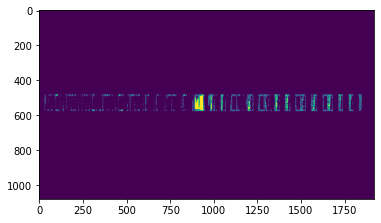

In [158]:
#ここから画像の比較
import cv2
import matplotlib.pyplot as plt



img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print(img_1_gray.shape)
img_1 = cv2.bitwise_or(img_1_gray, im_mask)

#比較したい画像を入力
img_2 = cv2.imread('./imagefile/tryout/img_151.jpg',1)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
print(img_2_gray.shape)
img_2 = cv2.bitwise_or(img_2_gray, im_mask)



#画像を引き算
img_diff = cv2.absdiff(img_1, img_2)

#2値化
ret2,img_th = cv2.threshold(img_diff,20,255,cv2.THRESH_BINARY)

plt.imshow(img_th)




True

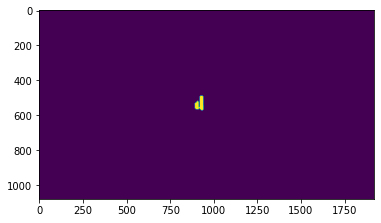

In [160]:
 # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
ksize=3
#中央値フィルタ
img_mask = cv2.medianBlur(img_th,ksize)
# 近傍の定義
neiborhood = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],
             np.uint8)

# 収縮
#img_mask = cv2.erode(img_th,neiborhood,iterations=6)
# 膨張
#img_mask = cv2.dilate(img_mask,neiborhood,iterations=6)


plt.imshow(img_mask)
cv2.imwrite("./after/sa.jpg",img_mask)

918
hakken

[[918, 1]]


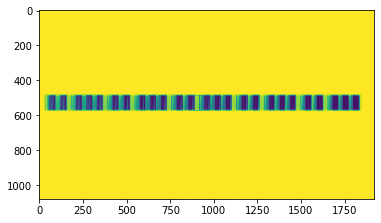

In [161]:
#輪郭を検出
contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = list(filter(lambda x: cv2.contourArea(x) > 400, contours))

testarray=[]

#閾値以上の差分を四角で囲う
for i,cnt in enumerate(contours):
    if width > 50 or height > 50:
        x, y, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(img_1, (x, y), (x+width, y+height), (0, 0, 255), 1)
        #黒鍵検出　元の影よりも重心のx座標が大きいか小さいか
        jyusin = math.floor(x + width / 2)
        print(jyusin)
        i=1
        numi= xleft2[i]
        numi1=xleft2[i-1]

        while (numi-jyusin)*(numi-jyusin) < (numi1-jyusin)*(numi1-jyusin):
            i=i+1
            numi= xleft2[i]
            numi1=xleft2[i-1]
        if numi1 < jyusin :
            print("kokken")
            kenshoku = 0

        else :
            if numi1 >= jyusin :
                print("hakken")
                kenshoku = 1

            else :
                print("nothing")
        testarray+=[[jyusin,kenshoku]]
        print("")

plt.imshow(img_1)
print(testarray)




In [148]:
cx=[]
#cy=[]
i=0
while i<len(testarray):
    #M = cv2.moments(cnt)
    #cx = int(M['m10']/M['m00'])
    #cy = int(M['m01']/M['m00'])

    cx += [testarray[i][0]]
    #cy += [500]#(仮)
    i+=1
print(cx)

[772]


In [149]:
cy=500#(仮)
#cv2.rectangle(img_2,(cx,cy),(cx+1,cy+1),(0,255,0),3)
#plt.imshow(img_2)

In [150]:
keyinfo=[]
j=0
while j<len(cx):
    i=0
    while hakken[i+1][0]<cx[j]:
        #print(hakkendoremi[i])
        i+=1
    score=str(doremi[(hstart+i)%7]+str(math.floor(i/7)+n))
    print(score)
    #白鍵と黒鍵の変更
    if testarray[j][1] == 1  or (doremi[(hstart+i)%7]=="E") or (doremi[(hstart+i)%7]=="B"):
        print(score)
        keyinfo+=[score]
    else :
        if testarray[j][1] == 0 :
            print(score[:1] + '#' + score[1:])
            keyinfo+=[score[:1] + '#' + score[1:]]
    
    j+=1
print(keyinfo)

C5
C5
['C5']


In [151]:
#01に変換
bothdoremi=hakkendoremi+kokkendoremi
print(bothdoremi)

['B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F6', 'G6', 'A6', 'B6', 'C7', 'D7', 'E7', 'F7', 'G7', 'A7', 'B7', 'C8', 'C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6', 'F#6', 'G#6', 'A#6', 'C#7', 'D#7', 'F#7', 'G#7', 'A#7']


In [152]:
#同時押しができたら
output=[]
i=0
while i<len(bothdoremi):
    if bothdoremi[i] in keyinfo:
        output+=[1]
    else:
        output+=[0]
    print(bothdoremi[i],output[i])
    i+=1
    
print(output)


B2 0
C3 0
D3 0
E3 0
F3 0
G3 0
A3 0
B3 0
C4 0
D4 0
E4 0
F4 0
G4 0
A4 0
B4 0
C5 1
D5 0
E5 0
F5 0
G5 0
A5 0
B5 0
C6 0
D6 0
E6 0
F6 0
G6 0
A6 0
B6 0
C7 0
D7 0
E7 0
F7 0
G7 0
A7 0
B7 0
C8 0
C#3 0
D#3 0
F#3 0
G#3 0
A#3 0
C#4 0
D#4 0
F#4 0
G#4 0
A#4 0
C#5 0
D#5 0
F#5 0
G#5 0
A#5 0
C#6 0
D#6 0
F#6 0
G#6 0
A#6 0
C#7 0
D#7 0
F#7 0
G#7 0
A#7 0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [153]:
"""from music21 import *
n = note.Note("D5",quarterLength = 4)
n.show('musicxml')"""

'from music21 import *\nn = note.Note("D5",quarterLength = 4)\nn.show(\'musicxml\')'